In [1]:
import astropy.units as u
import matplotlib.pyplot as plt

import pint.fitter
from pint.models import get_model_and_toas
from pint.residuals import Residuals
import pint.logging

pint.logging.setup(level="INFO")

1

In [3]:
parfile= "J1105-6107.par"
timfile= "J1105-6107.tim"

m, t_all = get_model_and_toas(parfile, timfile)
m

WARNING  (pint.models.model_builder     ): UNITS is not specified. Assuming TDB...
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False


TimingModel(
  AbsPhase(
    MJDParameter(   TZRMJD              57914.3295077349225347 (d) frozen=True),
    strParameter(   TZRSITE             mo                frozen=True),
    floatParameter( TZRFRQ              835.281006        (MHz) frozen=True)),
  AstrometryEquatorial(
    MJDParameter(   POSEPOCH            57600.0000000000000000 (d) frozen=True),
    floatParameter( PX                  0.0               (mas) frozen=True),
    AngleParameter( RAJ                 11:05:26.20662100 (hourangle) +/- 0h00m00.11789s frozen=False),
    AngleParameter( DECJ                -61:07:48.03906000 (deg) +/- 0d00m00.80662s frozen=False),
    floatParameter( PMRA                0.0               (mas / yr) frozen=True),
    floatParameter( PMDEC               0.0               (mas / yr) frozen=True)),
  DispersionDM(
    floatParameter( DM                  271.01            (pc / cm3) +/- 0.02 pc / cm3 frozen=True),
    floatParameter( DM1                 UNSET,
    MJDParameter(   DMEPOC

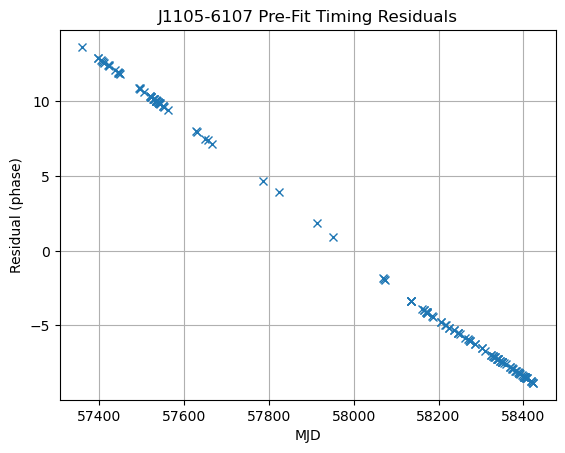

In [4]:
rs = Residuals(t_all, m).phase_resids
xt = t_all.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [5]:
t_all.print_summary()

Number of TOAs:  145
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  57360.783 to 58422.939
Date span: 2015-12-04 18:47:10.044822763 to 2018-10-31 22:31:50.178752052
most TOAs (145):
  Min freq:      834.368 MHz
  Max freq:      835.442 MHz
  Min error:     28.8 us
  Max error:     1.17e+03 us
  Median error:  95.9 us



In [6]:
error_ok = t_all.table["error"] <= 1000* u.us
t = t_all[error_ok]
t.print_summary()



Number of TOAs:  143
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  57360.783 to 58422.939
Date span: 2015-12-04 18:47:10.044822763 to 2018-10-31 22:31:50.178752052
most TOAs (143):
  Min freq:      834.368 MHz
  Max freq:      835.442 MHz
  Min error:     28.8 us
  Max error:     863 us
  Median error:  95.2 us



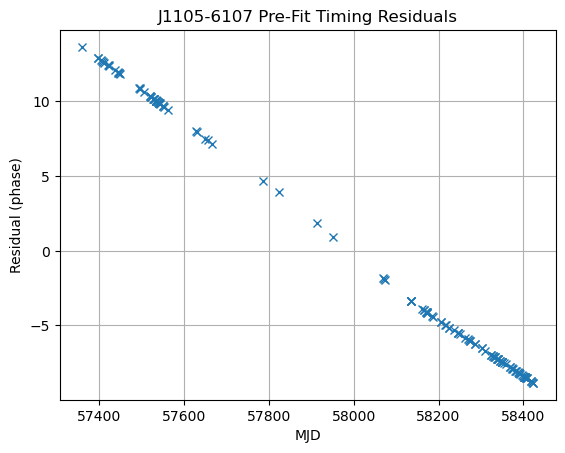

In [7]:
rs = Residuals(t, m).phase_resids
xt = t.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [8]:
f = pint.fitter.Fitter.auto(t, m)
f.fit_toas()

INFO     (pint.fitter                   ): For narrowband TOAs with correlated errors and downhill fitter, returning 'DownhillGLSFitter'


True

In [9]:
f.print_summary()


Fitted model using downhill_gls method with 4 free parameters to 143 TOAs
Prefit residuals Wrms = 521615.74508664897 us, Postfit residuals Wrms = 18829.203493869045 us
Chisq = 2038.891 for 138 d.o.f. for reduced Chisq of 14.775

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1105-6107 J1105-6107                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57360.8                      57360.8 d 
FINISH                      58422.9                      58422.9 d 
DILATEFREQ                        N                              None
DMDATA                            N                              None
NTO

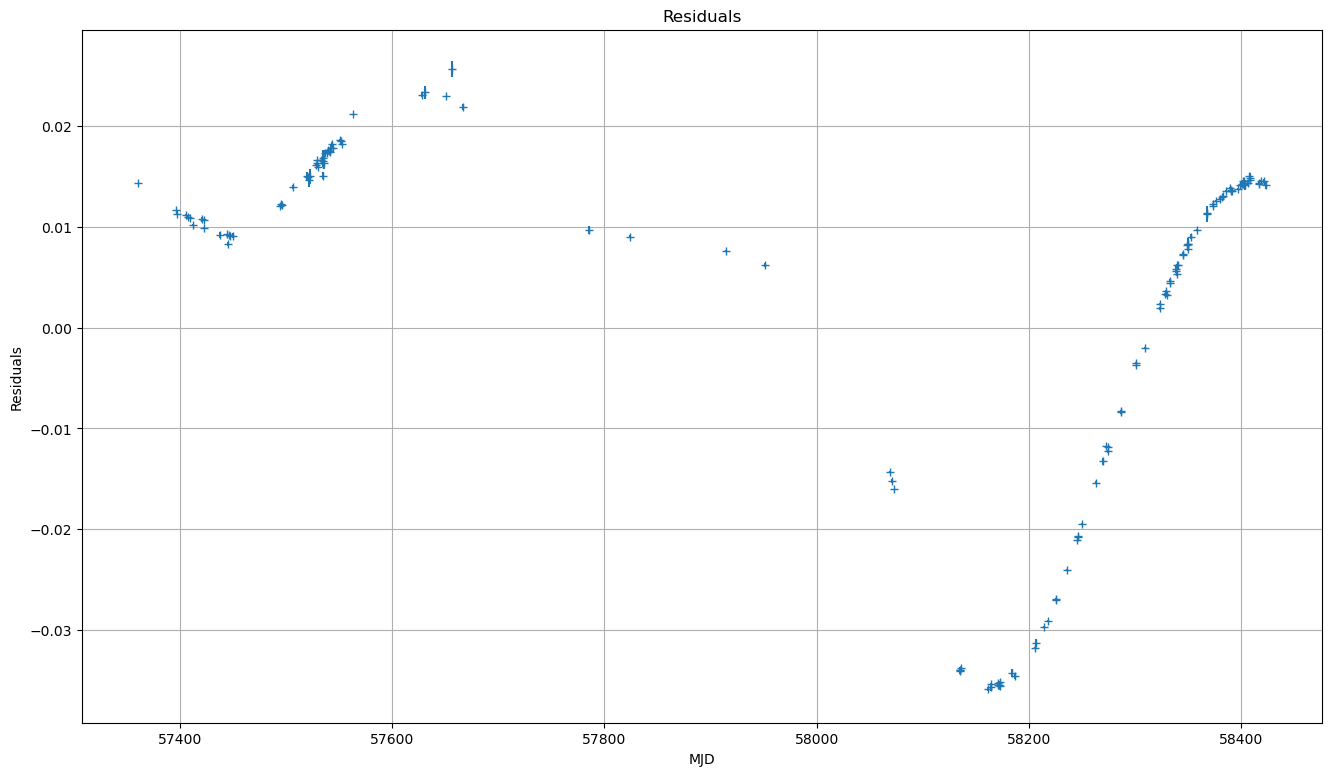

In [10]:
f.plot()

In [9]:
nu1=15.8222515841
nu2=15.82225144
nudot1=-3.96697e-12
nudot2=-3.9652e-12
dt_days=(58422.9+58172.6)/2-(58172.6+57360.8)/2
dt=dt_days*24*60*60

In [10]:
n=1+(nu1*nudot2-nu2*nudot1)/(nudot1*nudot2*dt)
print(n)

39.80248306289759
